## ClimateDataBasel.csv analysis 


#### What is this dataset?
- This dataset is weather data from the summer and winter between 2010 and 2019.
- It includes variables such as temperature, humidity, wind speed, air pressure, precipitation, and solar radiation.

#### What results are we hoping to achieve

In this analysis, we are aiming to:
- identify seasonal trends
- explore correlations between variables
- use visualisation techniques to interpret the climate behavior 

#### What steps are we going to take?
- #### Data Familiarisation
- #### Preprocessing:
	- checking for missing data
	- outlier detection and handling
	- normalisation
	- standardisation
	- feature extraction

- #### Clustering:
	- compare different clustering methods.
	- calculate measurable metrics for each method
	- compare using other subjective factors.



## Imports

In [84]:

# boilerplate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


# Dimensionality Reduction
from sklearn.decomposition import PCA


# Clustering
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage as scipy_linkage

from sklearn.cluster import DBSCAN

# Evaluation
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

## Setup

In [85]:

CSV_DIR = 'data/ClimateDataBasel.csv'


# open the file, and store as a DataFrame
df = pd.read_csv(CSV_DIR, header=None);

# there are no headers in the csv file, so we will add them manually.
df.columns = [
    "temp_min", 
    "temp_max", 
    "temp_avg", 
    "humidity_min", 
    "humidity_max",
    "humidity_avg", 
    "pressure_min", 
    "pressure_max", 
    "pressure_avg",
    "rain", 
    "snow", 
    "solar", 
    "wind_speed", 
    "wind_dir",
    "visibility", 
    "air_quality", 
    "ozone", 
    "uv_index"
]


## Preprocessing

### checking for missing data

Our first step is to familiarise ourself with the data. 
This will help us to decide on what to do with erroneous / missing data, and make sure our results make sense.
We are going to check if there are any erroneous datatypes or null values. We will also check here for any massive inconsistencies. e.g. an erroneously high or low value.

In [86]:
df.shape, df.columns.tolist()
df.head()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp_min      1763 non-null   float64
 1   temp_max      1763 non-null   float64
 2   temp_avg      1763 non-null   float64
 3   humidity_min  1763 non-null   int64  
 4   humidity_max  1763 non-null   int64  
 5   humidity_avg  1763 non-null   float64
 6   pressure_min  1763 non-null   float64
 7   pressure_max  1763 non-null   float64
 8   pressure_avg  1763 non-null   float64
 9   rain          1763 non-null   float64
 10  snow          1763 non-null   float64
 11  solar         1763 non-null   float64
 12  wind_speed    1763 non-null   float64
 13  wind_dir      1763 non-null   float64
 14  visibility    1763 non-null   float64
 15  air_quality   1763 non-null   float64
 16  ozone         1763 non-null   float64
 17  uv_index      1763 non-null   float64
dtypes: float64(16), int64(2)
mem

,count,mean,std,min,25%,50%,75%,max
temp_min,1763.0,8.738776,7.803700,-12.519471,1.700529,10.210529,15.530529,25.820530
temp_max,1763.0,16.779298,9.647769,-4.389471,8.200529,17.400530,25.190529,36.700527
temp_avg,1763.0,12.717350,8.788555,-7.628222,4.689279,14.618446,20.432404,30.425112
humidity_min,1763.0,54.092456,12.949827,19.000000,44.000000,54.000000,64.000000,93.000000
humidity_max,1763.0,87.004538,7.892077,53.000000,82.000000,88.000000,93.000000,100.000000
humidity_avg,1763.0,71.040509,10.012178,38.333332,63.520834,72.000000,78.750000,95.250000
pressure_min,1763.0,1014.690925,8.848251,976.100000,1010.300000,1014.600000,1019.300000,1043.600000
pressure_max,1763.0,1020.364492,8.014133,981.400000,1015.900000,1019.500000,1024.400000,1049.900000
pressure_avg,1763.0,1017.576393,8.282298,978.450000,1013.233400,1016.954040,1021.760405,1047.095800
rain,1763.0,1.502893,3.496710,0.000000,0.000000,0.000000,1.200000,37.399994


All Looks good so far, there are no incorrect data types, no NaNs or nulls.
and all of our mins and maxes seem reasonable.


### Outlier detection and handling
Lets now check that our min max avg fields all hold reasonable values relative to each other

In [87]:
# check if any temp_max values are less than temp_min values
temp_anomalies = df[df['temp_max'] < df['temp_min']]
print(f"Number of temperature anomalies detected: {temp_anomalies.shape[0]}")

# check avg temp values are within min and max
temp_avg_anomalies =    df[(df['temp_avg'] < df['temp_min'])
                        | (df['temp_avg'] > df['temp_max'])]
print(f"Number of temperature average anomalies detected: {temp_avg_anomalies.shape[0]}")


# check if any humidity_max values are less than humidity_min values
humidity_anomalies = df[df['humidity_max'] < df['humidity_min']]
print(f"Number of humidity anomalies detected: {humidity_anomalies.shape[0]}")


# check avg humidity values are within min and max
humidity_avg_anomalies =    df[(df['humidity_avg'] < df['humidity_min'])
                            | (df['humidity_avg'] > df['humidity_max'])]
print(f"Number of humidity average anomalies detected: {humidity_avg_anomalies.shape[0]}")

# check if any pressure_max values are less than pressure_min values
pressure_anomalies = df[df['pressure_max'] < df['pressure_min']]
print(f"Number of pressure anomalies detected: {pressure_anomalies.shape[0]}")

# check avg pressure values are within min and max
pressure_avg_anomalies =    df[(df['pressure_avg'] < df['pressure_min'])
                            | (df['pressure_avg'] > df['pressure_max'])]
print(f"Number of pressure average anomalies detected: {pressure_avg_anomalies.shape[0]}")

Number of temperature anomalies detected: 0
Number of temperature average anomalies detected: 0
Number of humidity anomalies detected: 0
Number of humidity average anomalies detected: 0
Number of pressure anomalies detected: 0
Number of pressure average anomalies detected: 0


Great! There are no anomalies here.
Now, lets check for any anomalies by calculating z-scores. 
We will then plot these alongside the rest of the data, and visually check if there is anything abnormal.

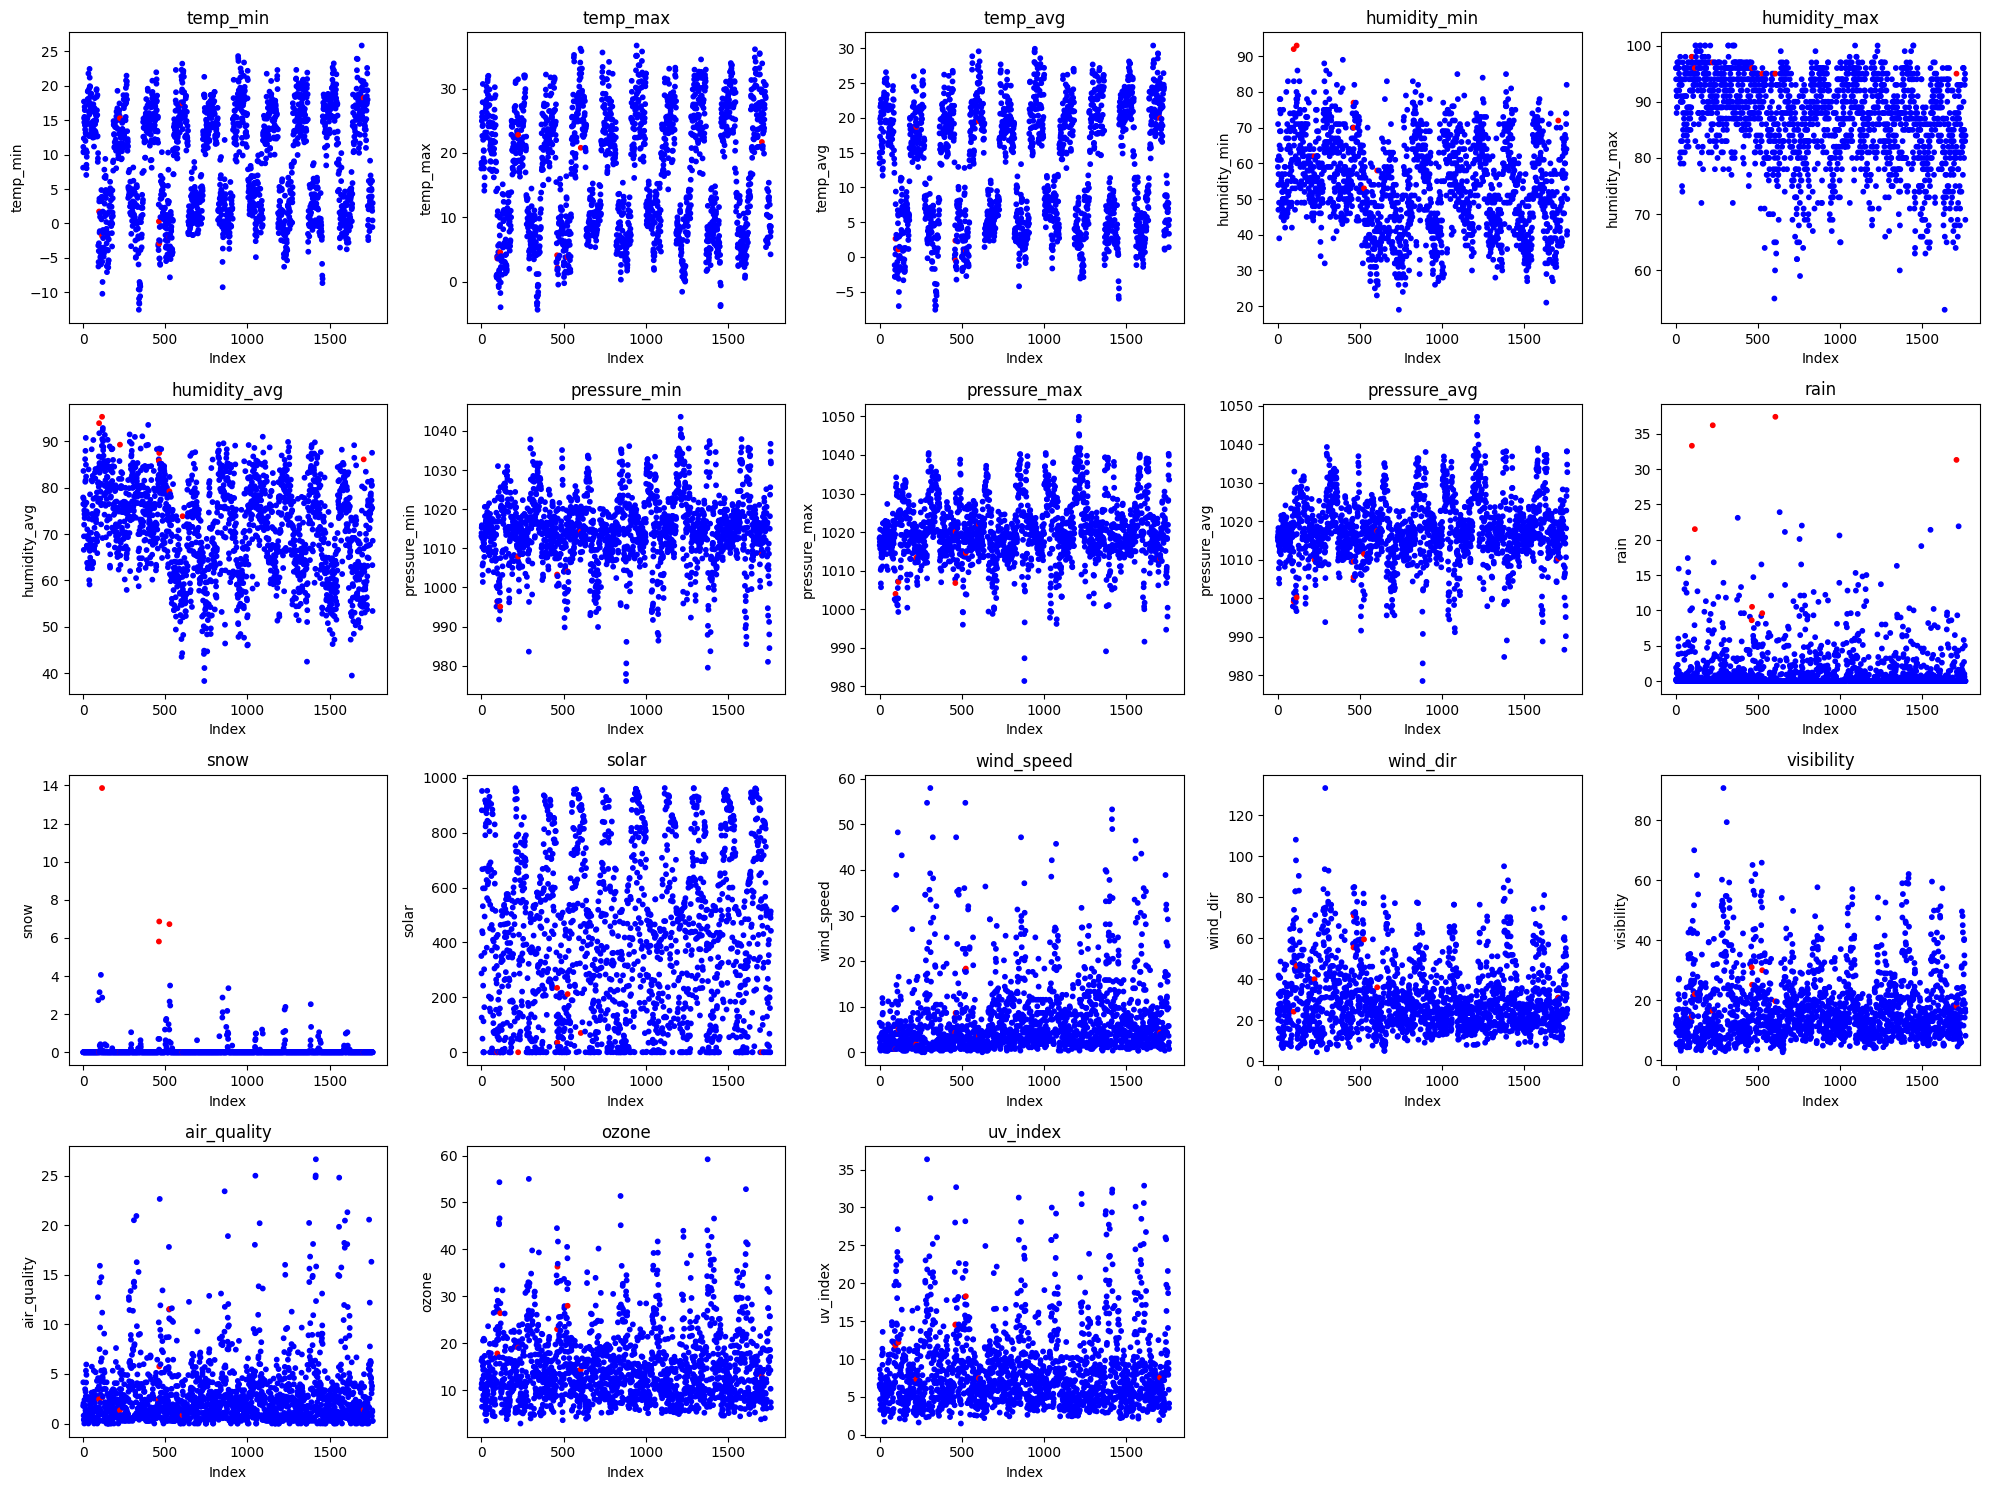

In [88]:
# define k 
k = 8

# get mean and standard deviation
mean = df.mean()
stdev = df.std()

# calculate zscores. These are the number of standard deviations away from the mean a data point lies.
z_scores = np.abs((df - mean) / stdev)

# if a row has any of these, mark as an outlier.
outliers = (z_scores > k).any(axis=1)


plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(4, 5, i + 1)
    plt.scatter(df.index, df[column], c=outliers.map({True: 'red', False: 'blue'}), s=10)
    plt.title(column)
    plt.xlabel('Index')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


After looking through these outliers manually, all of these seem normal. And do not seem like erroneous values that need to be removed. 
In a weather system especially, outliers or extreme weather events are events of extreme importance and the largest amount of interest. so unless there is a faulty reading, there is no need to remove data.

Lets draw a correlation graph in order to see which variables are potentially colinear

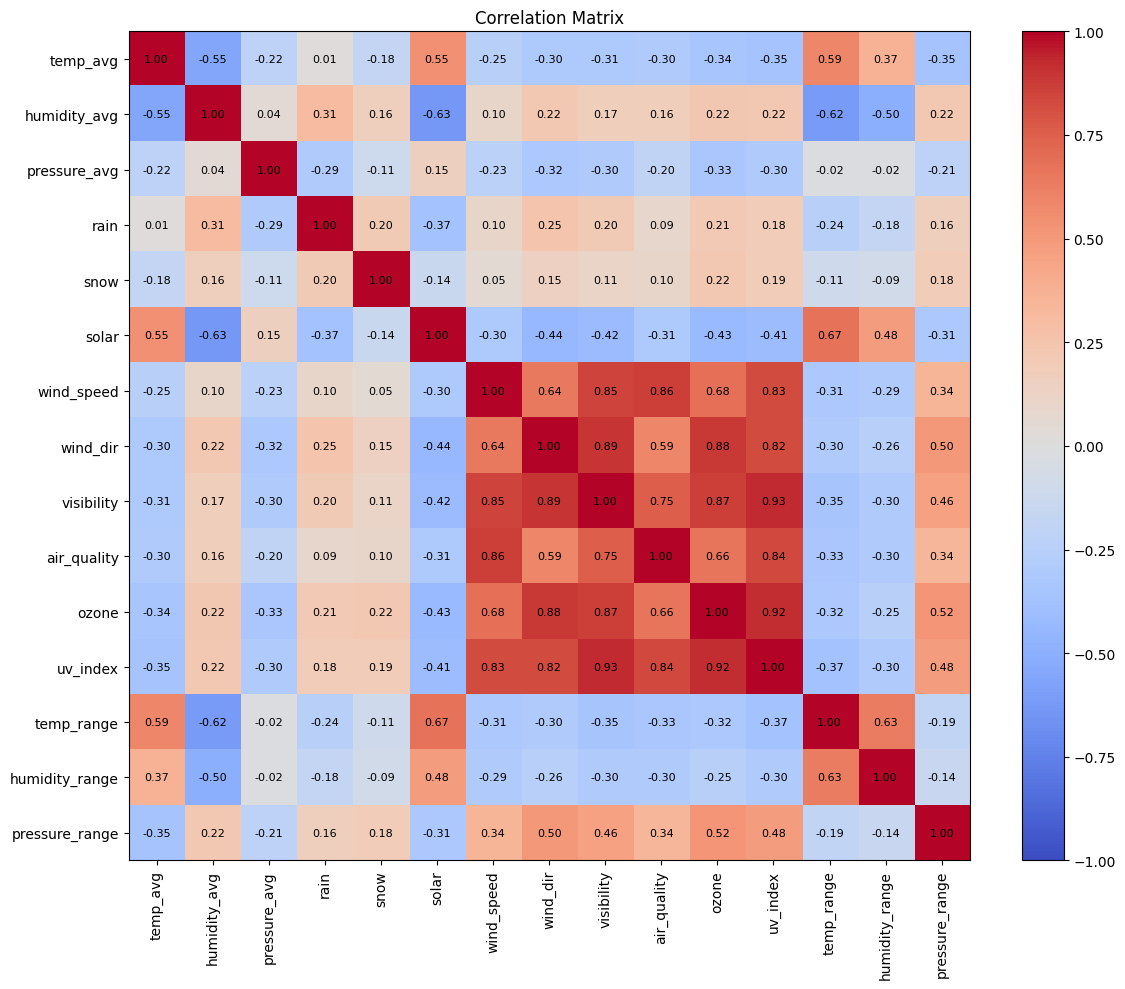

In [89]:
# correlaton grid 

import numpy as np

plt.figure(figsize=(12, 10))
correlation_matrix = scaled_df.corr()

# Create heatmap using matplotlib
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Add colorbar
plt.colorbar(im)

# Set ticks and labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Annotate cells with correlation values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                ha='center', va='center', color='black', fontsize=8)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

Next, in order to begin clustering this data, we must remove any fields that may confuse the clustering process.
I will use my discresion to replace the min and max features with a temp_range in order to reduce colinearity.

In [90]:
df["temp_range"] = df["temp_max"] - df["temp_min"]
df["humidity_range"] = df["humidity_max"] - df["humidity_min"]
df["pressure_range"] = df["pressure_max"] - df["pressure_min"]

# remove min max
df = df.drop(columns=[
    "temp_min", 
    "temp_max", 
    "humidity_min", 
    "humidity_max", 
    "pressure_min", 
    "pressure_max"
])

### Normalisation and Standardisation


Now it is time to normalise and standardise the data. This will make the data easier to work with.
This will ensure thatfeatures with differnt scales dont overpower each other.

In this instance, Standardisation is useful for:
- PCA

Normalisation is useful for:
- K-means
- DBSCAN


In [91]:
# standardise data


scaled_df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
scaled_df.head()



# normalise data


#normaliser = MinMaxScaler(feature_range=(0,1));
#normalised_data = normaliser.fit_transform(df)
#normalised_df = pd.DataFrame(normalised_data, columns=df.columns)

normalised_df = pd.DataFrame(MinMaxScaler(feature_range=(0,1)).fit_transform(df), columns=df.columns)
normalised_df.head()





,temp_avg,humidity_avg,pressure_avg,rain,snow,solar,wind_speed,wind_dir,visibility,air_quality,ozone,uv_index,temp_range,humidity_range,pressure_range
0,0.553784,0.694729,0.543490,0.005348,0.0,0.364303,0.055901,0.148045,0.107855,0.066998,0.133575,0.147563,0.503822,0.492308,0.123494
1,0.594352,0.669839,0.532322,0.050802,0.0,0.298492,0.111801,0.162011,0.138184,0.156010,0.238031,0.204255,0.370701,0.492308,0.045181
2,0.575399,0.795022,0.552655,0.002674,0.0,0.131214,0.055901,0.153631,0.114159,0.076063,0.149319,0.139890,0.400637,0.338462,0.030120
3,0.655330,0.690337,0.565402,0.000000,0.0,0.915788,0.037267,0.122905,0.076844,0.029963,0.152750,0.091657,0.826115,0.538462,0.048193
4,0.722933,0.496340,0.578820,0.000000,0.0,0.988863,0.012422,0.089385,0.032373,0.014124,0.063253,0.052092,0.745223,0.584615,0.114458


Great. Now all of the data is standardised and normalised, ready to be worked with.

### Feature selection/Extraction

We are going to run PCA in order to reduce the number of componenets. This will allow us to remove colinearity.
Lets first graph the explained variance ratio for each componenet. This allows us to see how many principal components we need in order to approximate our data.

Explained variance ratio for each component: [0.43206547 0.16182542 0.09274196 0.06852687 0.05403164 0.04040032
 0.03524209 0.03180533 0.02403934 0.01861483]
Number of components kept: 10


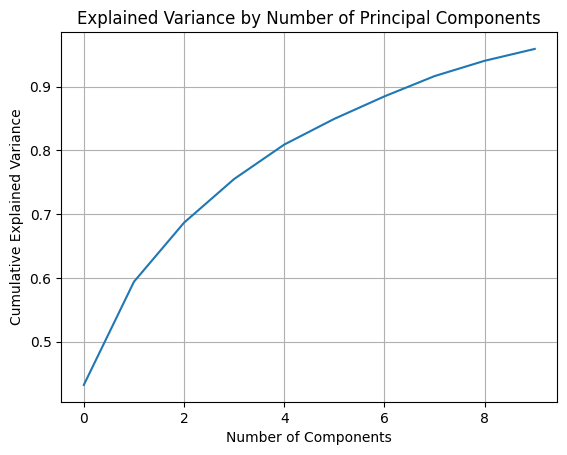

In [92]:

pca = PCA(n_components=0.95)
pca_result = pca.fit_transform(scaled_df)

print("Explained variance ratio for each component:", pca.explained_variance_ratio_)
print("Number of components kept:", pca.n_components_)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


In [93]:
import pandas as pd

pc_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
data_pca_df = pd.DataFrame(pca_result, columns=pc_columns)
data_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.930133,0.488682,0.181646,0.058660,-0.328657,-0.378908,-0.296086,0.191696,0.672191,-0.336438
1,-0.016655,0.290844,0.228926,-0.639393,0.286380,0.031197,-0.725797,0.238153,0.407262,-0.165226
2,-0.471177,1.497978,0.102133,-0.745420,0.217340,-0.565736,-0.547924,-0.319429,0.813334,-0.718914
3,-2.451445,-0.729686,0.102928,0.284449,0.132331,0.056049,0.054669,-0.122592,1.898352,0.298442
4,-3.235970,-1.013144,0.119421,0.479234,-0.018099,-0.109274,0.571876,0.238751,0.810780,0.367646


### Clustering.

Now it is time to Cluster our data.
There are a few ways of doing this, and we will be comparing the following:
- KMeans
- Agglomerative
- DBScan

### KMeans Clustering

KMeans clustering has a variable called k which we need to define. This variable can be calculated by plotting the silhouette score against the elbow inertia graph.
When the silhouette score peaks, and the elbow happens, then we use this value.

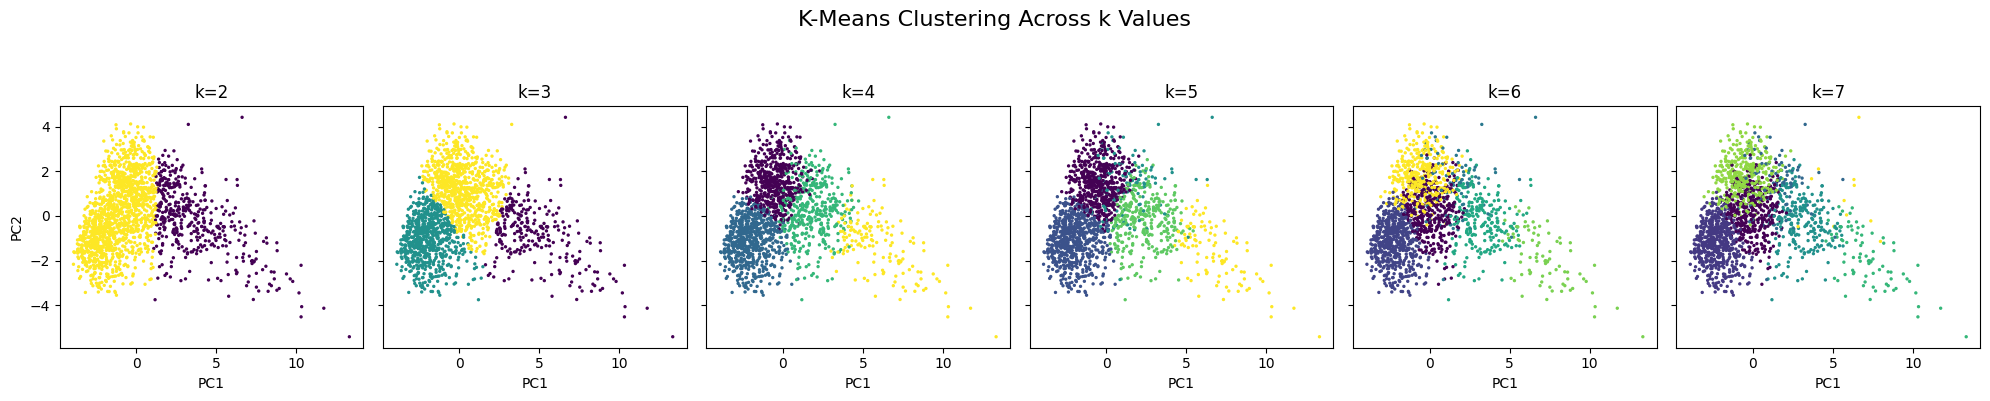

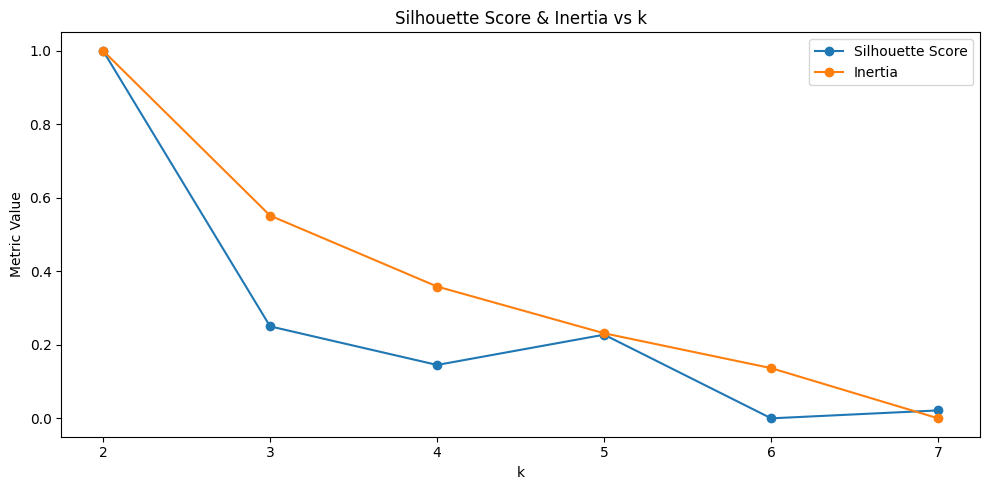

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


k_values = [2, 3, 4, 5, 6, 7]
pc1 = data_pca_df['PC1'].values
pc2 = data_pca_df['PC2'].values

fig, axes = plt.subplots(1, len(k_values), figsize=(20, 4), sharex=True, sharey=True)
plt.suptitle('K-Means Clustering Across k Values', fontsize=16, y=1.02)

silhouette_scores = []
inertia_values = []


for j, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca_df[pc_columns])  # Use 8 PCs
    ax = axes[j]
    scatter = ax.scatter(pc1, pc2, c=labels, cmap='viridis', s=2, alpha=1)
    ax.set_title(f'k={k}')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.label_outer()
    # calculate silhouette score and inertia
    silhouette_scores.append(silhouette_score(data_pca_df[pc_columns], labels))
    inertia_values.append(kmeans.inertia_)


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()



# plot silhouette scores and inertia values
sil_scaled = (silhouette_scores - np.min(silhouette_scores)) / (np.max(silhouette_scores) - np.min(silhouette_scores))
inertia_scaled = (inertia_values - np.min(inertia_values)) / (np.max(inertia_values) - np.min(inertia_values))


fig2, ax = plt.subplots(figsize=(10, 5))
ax.plot(k_values, sil_scaled, marker='o', label='Silhouette Score')
ax.plot(k_values, inertia_scaled, marker='o', label='Inertia')
ax.set_title('Silhouette Score & Inertia vs k')
ax.set_xlabel('k')
ax.set_ylabel('Metric Value')
ax.legend()
plt.tight_layout()
plt.show()






In [95]:
# Silhouette score
# print silhouette score for k=3
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
labels_k3 = kmeans_k3.fit_predict(data_pca_df[pc_columns])
silhouette_k3 = silhouette_score(data_pca_df[pc_columns], labels_k3)
print(f"Silhouette Score for k=3: {silhouette_k3:.4f}")


# Davies-Bouldin index
# print Davies-Bouldin index for k=3
db_index_k3 = davies_bouldin_score(data_pca_df[pc_columns], labels_k3)
print(f"Davies-Bouldin Index for k=3: {db_index_k3:.4f}")


Silhouette Score for k=3: 0.2478
Davies-Bouldin Index for k=3: 1.3944


#### Which k should we use?

 - We plotted the silhouette score against the elbow inertia.
 - When the peak meets the elbow bend, use this value for k.
 - if these do not line up, then use the silhouette score as it is more reliable.

 - Clearly, 3 or 4 is the best choice. I am picking 3 because the data supports it.

The Final K means metrics:

In [ ]:
# Ensure X_pca exists before running diagnostics
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Option 1: use previously computed PCA dataframe if present
if 'data_pca_df' in globals():
    X_pca = data_pca_df.values
    print("Using existing data_pca_df -> X_pca (shape", X_pca.shape, ")")

# Option 2: run PCA on scaled_df (you created scaled_df earlier)
elif 'scaled_df' in globals():
    pca = PCA(n_components=0.95, svd_solver='full')
    X_pca = pca.fit_transform(scaled_df.values)
    pc_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
    data_pca_df = pd.DataFrame(X_pca, columns=pc_columns)
    print("Computed X_pca from scaled_df -> X_pca (shape", X_pca.shape, ")")
    print("PCA components kept:", pca.n_components_)

else:
    raise RuntimeError(
        "No data_pca_df or scaled_df found in the notebook. "
        "Run the preprocessing/PCA cell (create scaled_df then PCA) or set X_pca manually."
    )S

Using existing data_pca_df -> X_pca (shape (1763, 10) )


Cluster sizes:
 {0: 801, 1: 257, 2: 705}
Silhouette = 0.2472, Davies-Bouldin = 1.3904
Per-cluster silhouette means: {np.int32(0): np.float64(0.1516602754787968), np.int32(1): np.float64(0.14859596656138357), np.int32(2): np.float64(0.3918182874083652)}


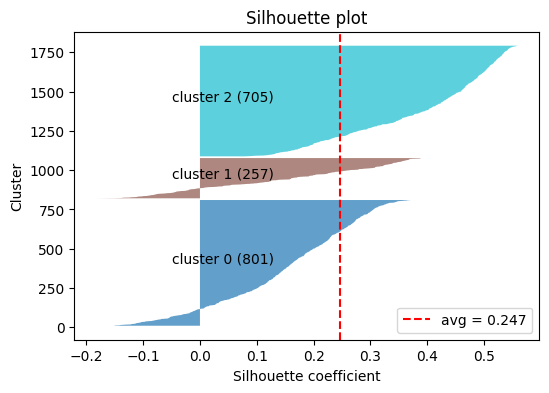

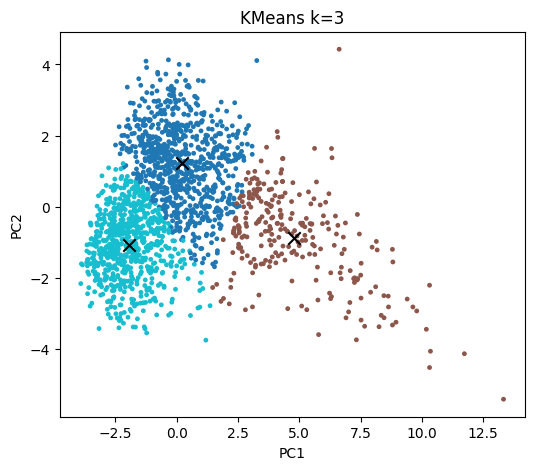

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

# X_pca is your PCA-transformed data (use X_pca from your pipeline)
# labels_k3 is labels from kmeans with k=3 (you computed earlier)

k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = km.fit_predict(X_pca)

# 1) cluster sizes
sizes = pd.Series(labels).value_counts().sort_index()
print("Cluster sizes:\n", sizes.to_dict())

# 2) overall metrics (again) and per-cluster silhouette
if len(np.unique(labels)) > 1:
    sil = silhouette_score(X_pca, labels)
    db = davies_bouldin_score(X_pca, labels)
    sil_samples = silhouette_samples(X_pca, labels)
    per_cluster_sil = {i: sil_samples[labels==i].mean() for i in np.unique(labels)}
    print(f"Silhouette = {sil:.4f}, Davies-Bouldin = {db:.4f}")
    print("Per-cluster silhouette means:", per_cluster_sil)
else:
    print("Only one cluster found; cannot compute silhouette/db index.")

# 3) silhouette plot (visual)
def plot_silhouette(X, labels):
    sil_vals = silhouette_samples(X, labels)
    y_lower = 10
    fig, ax = plt.subplots(figsize=(6,4))
    for i in np.unique(labels):
        ith_sil_vals = np.sort(sil_vals[labels == i])
        size_cluster = ith_sil_vals.shape[0]
        y_upper = y_lower + size_cluster
        color = plt.cm.tab10(i / (len(np.unique(labels)) - 1 if len(np.unique(labels))>1 else 1))
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_sil_vals, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster, f"cluster {i} ({size_cluster})")
        y_lower = y_upper + 10
    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster")
    ax.axvline(sil, color="red", linestyle="--", label=f"avg = {sil:.3f}")
    ax.set_title("Silhouette plot")
    ax.legend()
    plt.show()

if len(np.unique(labels)) > 1:
    plot_silhouette(X_pca, labels)

# 4) PC1/PC2 scatter with centroids (if >=2 PCs)
if X_pca.shape[1] >= 2:
    pc1, pc2 = X_pca[:,0], X_pca[:,1]
    centers = km.cluster_centers_
    plt.figure(figsize=(6,5))
    plt.scatter(pc1, pc2, c=labels, s=6, cmap='tab10')
    plt.scatter(centers[:,0], centers[:,1], c='k', s=80, marker='x')
    plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title(f'KMeans k={k}')
    plt.show()